# A-E vs I-E

### Load data

In [1]:
from src.preprocessing import *
from src.benchmarks import *
from src.models import *
 
print('...loading the dataset from mongodb...')
X_0, y_0 = load_data('bio_dataset', 'GM12878', 'A-E', 'I-E', 'epigenomic')
X_1, y_1 = load_data('bio_dataset', 'HelaS3', 'A-E', 'I-E', 'epigenomic')
X_2, y_2 = load_data('bio_dataset', 'HepG2', 'A-E', 'I-E', 'epigenomic')
X_3, y_3 = load_data('bio_dataset', 'K562', 'A-E', 'I-E', 'epigenomic')
print('...dataset loaded...')

Using TensorFlow backend.
W0627 16:36:22.669993 140363225818752 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
/usr/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


...loading the dataset from mongodb...
...dataset loaded...


### Split data between training, validation and test set

In [2]:
X_train = [[] for i in range(4)]
X_test = [[] for i in range(4)]
X_val = [[] for i in range(4)]
y_train = [[] for i in range(4)]
y_test = [[] for i in range(4)]
y_val = [[] for i in range(4)]

print('...splitting between training-set and test-set...')
print()

X_train[0], X_test[0], y_train[0], y_test[0] = splitting(X_0, y_0, 0.2)
X_train[0], X_val[0], y_train[0], y_val[0] = splitting(X_train[0], y_train[0], 0.2)

print(f'[GM12878] # samples in training-set: {len(X_train[0])}')
print(f'[GM12878] # samples in test-set: {len(X_test[0])}')
print(f'[GM12878] # samples in validation-set: {len(X_val[0])}')
print()

X_train[1], X_test[1], y_train[1], y_test[1] = splitting(X_1, y_1, 0.2)
X_train[1], X_val[1], y_train[1], y_val[1] = splitting(X_train[1], y_train[1], 0.2)

print(f'[HelaS3] # samples in training-set: {len(X_train[1])}')
print(f'[HelaS3] # samples in test-set: {len(X_test[1])}')
print(f'[HelaS3] # samples in validation-set: {len(X_val[1])}')
print()

X_train[2], X_test[2], y_train[2], y_test[2] = splitting(X_2, y_2, 0.2)
X_train[2], X_val[2], y_train[2], y_val[2] = splitting(X_train[2], y_train[2], 0.2)

print(f'[HepG2] # samples in training-set: {len(X_train[2])}')
print(f'[HepG2] # samples in test-set: {len(X_test[2])}')
print(f'[HepG2] # samples in validation-set: {len(X_val[2])}')
print()

X_train[3], X_test[3], y_train[3], y_test[3] = splitting(X_3, y_3, 0.2)
X_train[3], X_val[3], y_train[3], y_val[3] = splitting(X_train[3], y_train[3], 0.2)

print(f'[K562] # samples in training-set: {len(X_train[3])}')
print(f'[K562] # samples in test-set: {len(X_test[3])}')
print(f'[K562] # samples in validation-set: {len(X_val[3])}')

...splitting between training-set and test-set...

[GM12878] # samples in training-set: 19861
[GM12878] # samples in test-set: 6207
[GM12878] # samples in validation-set: 4966

[HelaS3] # samples in training-set: 21776
[HelaS3] # samples in test-set: 6806
[HelaS3] # samples in validation-set: 5444

[HepG2] # samples in training-set: 23052
[HepG2] # samples in test-set: 7205
[HepG2] # samples in validation-set: 5764

[K562] # samples in training-set: 22582
[K562] # samples in test-set: 7058
[K562] # samples in validation-set: 5646


### Balance data

In [3]:
X_train_adasyn = [[] for i in range(4)]
y_train_adasyn = [[] for i in range(4)]
X_train_smoteenn = [[] for i in range(4)]
y_train_smoteenn = [[] for i in range(4)]


print('...oversampling training-set with ADASYN...')

X_train_adasyn[0], y_train_adasyn[0] = oversampling_adasyn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_adasyn[0])} (active: {(y_train_adasyn[0] == 1).sum()}, inactive: {(y_train_adasyn[0] == 0).sum()})')

X_train_adasyn[1], y_train_adasyn[1] = oversampling_adasyn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_adasyn[1])} (active: {(y_train_adasyn[1] == 1).sum()}, inactive: {(y_train_adasyn[1] == 0).sum()})')

X_train_adasyn[2], y_train_adasyn[2] = oversampling_adasyn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_adasyn[2])} (active: {(y_train_adasyn[2] == 1).sum()}, inactive: {(y_train_adasyn[2] == 0).sum()})')

X_train_adasyn[3], y_train_adasyn[3] = oversampling_adasyn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_adasyn[3])} (active: {(y_train_adasyn[3] == 1).sum()}, inactive: {(y_train_adasyn[3] == 0).sum()})')

print()
print('...oversampling training-set with SMOTEENN...')

X_train_smoteenn[0], y_train_smoteenn[0] = sampling_smoteenn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_smoteenn[0])} (active: {(y_train_smoteenn[0] == 1).sum()}, inactive: {(y_train_smoteenn[0] == 0).sum()})')

X_train_smoteenn[1], y_train_smoteenn[1] = sampling_smoteenn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_smoteenn[1])} (active: {(y_train_smoteenn[1] == 1).sum()}, inactive: {(y_train_smoteenn[1] == 0).sum()})')

X_train_smoteenn[2], y_train_smoteenn[2] = sampling_smoteenn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_smoteenn[2])} (active: {(y_train_smoteenn[2] == 1).sum()}, inactive: {(y_train_smoteenn[2] == 0).sum()})')

X_train_smoteenn[3], y_train_smoteenn[3] = sampling_smoteenn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_smoteenn[3])} (active: {(y_train_smoteenn[3] == 1).sum()}, inactive: {(y_train_smoteenn[3] == 0).sum()})')

...oversampling training-set with ADASYN...
[GM12878] # samples: 36056 (active: 18028, inactive: 18028)
[HelaS3] # samples: 41213 (active: 20605, inactive: 20608)
[HepG2] # samples: 44165 (active: 22033, inactive: 22132)
[K562] # samples: 44088 (active: 22063, inactive: 22025)

...oversampling training-set with SMOTEENN...
[GM12878] # samples: 32449 (active: 18023, inactive: 14426)
[HelaS3] # samples: 36951 (active: 20602, inactive: 16349)
[HepG2] # samples: 40171 (active: 22126, inactive: 18045)
[K562] # samples: 37164 (active: 22025, inactive: 15139)


## Benchmarks with the first MLP (2 layers, (256, 256))

In [4]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

W0627 16:46:57.190794 140363225818752 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 16:46:57.204622 140363225818752 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 16:46:57.206972 140363225818752 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 16:46:57.220998 140363225818752 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 16:46:57.228103 140363225818752 deprecat

...building the mlp...


W0627 16:46:57.391085 140363225818752 deprecation.py:323] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               26112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 92,161
Trainable params: 92,161
Non-trainable params: 0
_________________________________________________________________
None
Train on 36056 samples, validate on 4966 samples
Epoch 1/150
36056/36056 [==============================] - 1s 37us/step - loss: 0.3939 - acc: 0.8337 - auc_acc: 0.8650 - f1_acc: 0.8317 - precision_acc: 0.8637 - recall_acc: 0.8107 - val_loss: 0.2789 - val_acc: 0.931

36056/36056 [==============================] - 1s 26us/step - loss: 0.0366 - acc: 0.9913 - auc_acc: 0.9914 - f1_acc: 0.9912 - precision_acc: 0.9859 - recall_acc: 0.9967 - val_loss: 0.0970 - val_acc: 0.9776 - val_auc_acc: 0.9915 - val_f1_acc: 0.8870 - val_precision_acc: 0.8777 - val_recall_acc: 0.9068
Epoch 51/150
36056/36056 [==============================] - 1s 24us/step - loss: 0.0369 - acc: 0.9913 - auc_acc: 0.9916 - f1_acc: 0.9911 - precision_acc: 0.9868 - recall_acc: 0.9957 - val_loss: 0.0987 - val_acc: 0.9766 - val_auc_acc: 0.9917 - val_f1_acc: 0.8834 - val_precision_acc: 0.8629 - val_recall_acc: 0.9166
Epoch 52/150
36056/36056 [==============================] - 1s 25us/step - loss: 0.0358 - acc: 0.9918 - auc_acc: 0.9918 - f1_acc: 0.9917 - precision_acc: 0.9872 - recall_acc: 0.9964 - val_loss: 0.0987 - val_acc: 0.9766 - val_auc_acc: 0.9919 - val_f1_acc: 0.8819 - val_precision_acc: 0.8718 - val_recall_acc: 0.9041
Epoch 53/150
36056/36056 [==============================] - 1s 27us/

36056/36056 [==============================] - 1s 27us/step - loss: 0.0132 - acc: 0.9968 - auc_acc: 0.9961 - f1_acc: 0.9968 - precision_acc: 0.9949 - recall_acc: 0.9986 - val_loss: 0.1071 - val_acc: 0.9827 - val_auc_acc: 0.9962 - val_f1_acc: 0.9080 - val_precision_acc: 0.9331 - val_recall_acc: 0.8924
Epoch 103/150
36056/36056 [==============================] - 1s 26us/step - loss: 0.0124 - acc: 0.9970 - auc_acc: 0.9962 - f1_acc: 0.9970 - precision_acc: 0.9951 - recall_acc: 0.9990 - val_loss: 0.1082 - val_acc: 0.9833 - val_auc_acc: 0.9962 - val_f1_acc: 0.9125 - val_precision_acc: 0.9315 - val_recall_acc: 0.9012
Epoch 104/150
36056/36056 [==============================] - 1s 27us/step - loss: 0.0122 - acc: 0.9973 - auc_acc: 0.9962 - f1_acc: 0.9973 - precision_acc: 0.9957 - recall_acc: 0.9990 - val_loss: 0.1077 - val_acc: 0.9825 - val_auc_acc: 0.9962 - val_f1_acc: 0.9076 - val_precision_acc: 0.9257 - val_recall_acc: 0.8997
Epoch 105/150
36056/36056 [==============================] - 1s 26

Epoch 128/150
36056/36056 [==============================] - 1s 25us/step - loss: 0.0089 - acc: 0.9981 - auc_acc: 0.9969 - f1_acc: 0.9981 - precision_acc: 0.9970 - recall_acc: 0.9992 - val_loss: 0.1165 - val_acc: 0.9837 - val_auc_acc: 0.9969 - val_f1_acc: 0.9150 - val_precision_acc: 0.9446 - val_recall_acc: 0.8934
Epoch 129/150
36056/36056 [==============================] - 1s 25us/step - loss: 0.0088 - acc: 0.9980 - auc_acc: 0.9970 - f1_acc: 0.9980 - precision_acc: 0.9968 - recall_acc: 0.9993 - val_loss: 0.1160 - val_acc: 0.9833 - val_auc_acc: 0.9970 - val_f1_acc: 0.9127 - val_precision_acc: 0.9361 - val_recall_acc: 0.8964
Epoch 130/150
36056/36056 [==============================] - 1s 26us/step - loss: 0.0089 - acc: 0.9981 - auc_acc: 0.9970 - f1_acc: 0.9981 - precision_acc: 0.9967 - recall_acc: 0.9995 - val_loss: 0.1170 - val_acc: 0.9837 - val_auc_acc: 0.9970 - val_f1_acc: 0.9140 - val_precision_acc: 0.9454 - val_recall_acc: 0.8914
Epoch 131/150
36056/36056 [=========================

41213/41213 [==============================] - 1s 34us/step - loss: 0.4543 - acc: 0.7853 - auc_acc: 0.8304 - f1_acc: 0.7712 - precision_acc: 0.8439 - recall_acc: 0.7207 - val_loss: 0.3486 - val_acc: 0.9109 - val_auc_acc: 0.8699 - val_f1_acc: 0.5299 - val_precision_acc: 0.3842 - val_recall_acc: 0.9073
Epoch 2/150
41213/41213 [==============================] - 1s 27us/step - loss: 0.3837 - acc: 0.8289 - auc_acc: 0.8828 - f1_acc: 0.8123 - precision_acc: 0.8942 - recall_acc: 0.7467 - val_loss: 0.2852 - val_acc: 0.9331 - val_auc_acc: 0.8926 - val_f1_acc: 0.5946 - val_precision_acc: 0.4619 - val_recall_acc: 0.8897
Epoch 3/150
41213/41213 [==============================] - 1s 27us/step - loss: 0.3549 - acc: 0.8446 - auc_acc: 0.8996 - f1_acc: 0.8317 - precision_acc: 0.9002 - recall_acc: 0.7752 - val_loss: 0.2890 - val_acc: 0.9263 - val_auc_acc: 0.9051 - val_f1_acc: 0.5744 - val_precision_acc: 0.4346 - val_recall_acc: 0.8991
Epoch 4/150
41213/41213 [==============================] - 1s 27us/ste

41213/41213 [==============================] - 1s 28us/step - loss: 0.0557 - acc: 0.9860 - auc_acc: 0.9868 - f1_acc: 0.9860 - precision_acc: 0.9765 - recall_acc: 0.9959 - val_loss: 0.1274 - val_acc: 0.9710 - val_auc_acc: 0.9870 - val_f1_acc: 0.7558 - val_precision_acc: 0.7127 - val_recall_acc: 0.8390
Epoch 54/150
41213/41213 [==============================] - 1s 27us/step - loss: 0.0530 - acc: 0.9868 - auc_acc: 0.9871 - f1_acc: 0.9868 - precision_acc: 0.9778 - recall_acc: 0.9962 - val_loss: 0.1226 - val_acc: 0.9750 - val_auc_acc: 0.9872 - val_f1_acc: 0.7782 - val_precision_acc: 0.7667 - val_recall_acc: 0.8211
Epoch 55/150
41213/41213 [==============================] - 1s 27us/step - loss: 0.0504 - acc: 0.9870 - auc_acc: 0.9873 - f1_acc: 0.9870 - precision_acc: 0.9785 - recall_acc: 0.9959 - val_loss: 0.1286 - val_acc: 0.9728 - val_auc_acc: 0.9875 - val_f1_acc: 0.7672 - val_precision_acc: 0.7308 - val_recall_acc: 0.8405
Epoch 56/150
41213/41213 [==============================] - 1s 29us/

41213/41213 [==============================] - 1s 30us/step - loss: 0.0251 - acc: 0.9937 - auc_acc: 0.9936 - f1_acc: 0.9937 - precision_acc: 0.9893 - recall_acc: 0.9983 - val_loss: 0.1475 - val_acc: 0.9774 - val_auc_acc: 0.9936 - val_f1_acc: 0.7970 - val_precision_acc: 0.8051 - val_recall_acc: 0.8191
Epoch 106/150
41213/41213 [==============================] - 1s 26us/step - loss: 0.0235 - acc: 0.9939 - auc_acc: 0.9937 - f1_acc: 0.9939 - precision_acc: 0.9896 - recall_acc: 0.9983 - val_loss: 0.1431 - val_acc: 0.9781 - val_auc_acc: 0.9937 - val_f1_acc: 0.8017 - val_precision_acc: 0.8114 - val_recall_acc: 0.8238
Epoch 107/150
41213/41213 [==============================] - 1s 26us/step - loss: 0.0233 - acc: 0.9946 - auc_acc: 0.9937 - f1_acc: 0.9946 - precision_acc: 0.9910 - recall_acc: 0.9983 - val_loss: 0.1432 - val_acc: 0.9791 - val_auc_acc: 0.9938 - val_f1_acc: 0.8077 - val_precision_acc: 0.8245 - val_recall_acc: 0.8191
Epoch 108/150
41213/41213 [==============================] - 1s 26

Epoch 131/150
41213/41213 [==============================] - 1s 27us/step - loss: 0.0161 - acc: 0.9961 - auc_acc: 0.9949 - f1_acc: 0.9960 - precision_acc: 0.9932 - recall_acc: 0.9990 - val_loss: 0.1512 - val_acc: 0.9794 - val_auc_acc: 0.9949 - val_f1_acc: 0.8072 - val_precision_acc: 0.8320 - val_recall_acc: 0.8128
Epoch 132/150
41213/41213 [==============================] - 1s 25us/step - loss: 0.0158 - acc: 0.9956 - auc_acc: 0.9949 - f1_acc: 0.9956 - precision_acc: 0.9926 - recall_acc: 0.9986 - val_loss: 0.1534 - val_acc: 0.9798 - val_auc_acc: 0.9949 - val_f1_acc: 0.8119 - val_precision_acc: 0.8463 - val_recall_acc: 0.8084
Epoch 133/150
41213/41213 [==============================] - 1s 30us/step - loss: 0.0163 - acc: 0.9961 - auc_acc: 0.9950 - f1_acc: 0.9961 - precision_acc: 0.9936 - recall_acc: 0.9987 - val_loss: 0.1513 - val_acc: 0.9802 - val_auc_acc: 0.9950 - val_f1_acc: 0.8135 - val_precision_acc: 0.8425 - val_recall_acc: 0.8152
Epoch 134/150
41213/41213 [=========================

Epoch 4/150
44165/44165 [==============================] - 1s 27us/step - loss: 0.2749 - acc: 0.8790 - auc_acc: 0.9317 - f1_acc: 0.8703 - precision_acc: 0.9279 - recall_acc: 0.8216 - val_loss: 0.2483 - val_acc: 0.9403 - val_auc_acc: 0.9357 - val_f1_acc: 0.5442 - val_precision_acc: 0.4080 - val_recall_acc: 0.8800
Epoch 5/150
44165/44165 [==============================] - 1s 24us/step - loss: 0.2578 - acc: 0.8882 - auc_acc: 0.9391 - f1_acc: 0.8815 - precision_acc: 0.9291 - recall_acc: 0.8401 - val_loss: 0.1876 - val_acc: 0.9566 - val_auc_acc: 0.9422 - val_f1_acc: 0.6162 - val_precision_acc: 0.5054 - val_recall_acc: 0.8555
Epoch 6/150
44165/44165 [==============================] - 1s 26us/step - loss: 0.2440 - acc: 0.8987 - auc_acc: 0.9450 - f1_acc: 0.8937 - precision_acc: 0.9305 - recall_acc: 0.8611 - val_loss: 0.3105 - val_acc: 0.9056 - val_auc_acc: 0.9470 - val_f1_acc: 0.4384 - val_precision_acc: 0.2986 - val_recall_acc: 0.9070
Epoch 7/150
44165/44165 [==============================] -

44165/44165 [==============================] - 1s 29us/step - loss: 0.0861 - acc: 0.9751 - auc_acc: 0.9818 - f1_acc: 0.9750 - precision_acc: 0.9654 - recall_acc: 0.9853 - val_loss: 0.1485 - val_acc: 0.9556 - val_auc_acc: 0.9821 - val_f1_acc: 0.6087 - val_precision_acc: 0.4902 - val_recall_acc: 0.8576
Epoch 31/150
44165/44165 [==============================] - 1s 26us/step - loss: 0.0851 - acc: 0.9757 - auc_acc: 0.9824 - f1_acc: 0.9757 - precision_acc: 0.9666 - recall_acc: 0.9856 - val_loss: 0.1456 - val_acc: 0.9580 - val_auc_acc: 0.9826 - val_f1_acc: 0.6240 - val_precision_acc: 0.5065 - val_recall_acc: 0.8657
Epoch 32/150
44165/44165 [==============================] - 1s 29us/step - loss: 0.0825 - acc: 0.9768 - auc_acc: 0.9829 - f1_acc: 0.9768 - precision_acc: 0.9673 - recall_acc: 0.9869 - val_loss: 0.1461 - val_acc: 0.9577 - val_auc_acc: 0.9831 - val_f1_acc: 0.6195 - val_precision_acc: 0.5043 - val_recall_acc: 0.8600
Epoch 33/150
44165/44165 [==============================] - 1s 26us/

44165/44165 [==============================] - 1s 25us/step - loss: 0.0270 - acc: 0.9930 - auc_acc: 0.9932 - f1_acc: 0.9929 - precision_acc: 0.9882 - recall_acc: 0.9977 - val_loss: 0.1158 - val_acc: 0.9750 - val_auc_acc: 0.9933 - val_f1_acc: 0.7115 - val_precision_acc: 0.6889 - val_recall_acc: 0.7899
Epoch 83/150
44165/44165 [==============================] - 1s 25us/step - loss: 0.0268 - acc: 0.9930 - auc_acc: 0.9933 - f1_acc: 0.9930 - precision_acc: 0.9885 - recall_acc: 0.9976 - val_loss: 0.1148 - val_acc: 0.9754 - val_auc_acc: 0.9933 - val_f1_acc: 0.7149 - val_precision_acc: 0.6938 - val_recall_acc: 0.7886
Epoch 84/150
44165/44165 [==============================] - 1s 25us/step - loss: 0.0260 - acc: 0.9933 - auc_acc: 0.9934 - f1_acc: 0.9933 - precision_acc: 0.9885 - recall_acc: 0.9983 - val_loss: 0.1175 - val_acc: 0.9752 - val_auc_acc: 0.9934 - val_f1_acc: 0.7163 - val_precision_acc: 0.6932 - val_recall_acc: 0.7923
Epoch 85/150
44165/44165 [==============================] - 1s 25us/

44165/44165 [==============================] - 1s 25us/step - loss: 0.0192 - acc: 0.9952 - auc_acc: 0.9949 - f1_acc: 0.9952 - precision_acc: 0.9918 - recall_acc: 0.9986 - val_loss: 0.1158 - val_acc: 0.9788 - val_auc_acc: 0.9949 - val_f1_acc: 0.7327 - val_precision_acc: 0.7523 - val_recall_acc: 0.7573
Epoch 109/150
44165/44165 [==============================] - 1s 24us/step - loss: 0.0185 - acc: 0.9954 - auc_acc: 0.9949 - f1_acc: 0.9953 - precision_acc: 0.9918 - recall_acc: 0.9990 - val_loss: 0.1208 - val_acc: 0.9785 - val_auc_acc: 0.9950 - val_f1_acc: 0.7328 - val_precision_acc: 0.7500 - val_recall_acc: 0.7562
Epoch 110/150
44165/44165 [==============================] - 1s 25us/step - loss: 0.0193 - acc: 0.9950 - auc_acc: 0.9950 - f1_acc: 0.9951 - precision_acc: 0.9916 - recall_acc: 0.9986 - val_loss: 0.1191 - val_acc: 0.9773 - val_auc_acc: 0.9950 - val_f1_acc: 0.7249 - val_precision_acc: 0.7256 - val_recall_acc: 0.7647
Epoch 111/150
44165/44165 [==============================] - 1s 25

Epoch 134/150
44165/44165 [==============================] - 1s 24us/step - loss: 0.0138 - acc: 0.9963 - auc_acc: 0.9959 - f1_acc: 0.9963 - precision_acc: 0.9936 - recall_acc: 0.9990 - val_loss: 0.1271 - val_acc: 0.9787 - val_auc_acc: 0.9959 - val_f1_acc: 0.7430 - val_precision_acc: 0.7360 - val_recall_acc: 0.7973
Epoch 135/150
44165/44165 [==============================] - 1s 26us/step - loss: 0.0135 - acc: 0.9964 - auc_acc: 0.9959 - f1_acc: 0.9964 - precision_acc: 0.9936 - recall_acc: 0.9992 - val_loss: 0.1219 - val_acc: 0.9792 - val_auc_acc: 0.9959 - val_f1_acc: 0.7445 - val_precision_acc: 0.7533 - val_recall_acc: 0.7778
Epoch 136/150
44165/44165 [==============================] - 1s 23us/step - loss: 0.0126 - acc: 0.9966 - auc_acc: 0.9959 - f1_acc: 0.9966 - precision_acc: 0.9942 - recall_acc: 0.9991 - val_loss: 0.1318 - val_acc: 0.9799 - val_auc_acc: 0.9959 - val_f1_acc: 0.7356 - val_precision_acc: 0.7827 - val_recall_acc: 0.7326
Epoch 137/150
44165/44165 [=========================

Epoch 7/150
44088/44088 [==============================] - 1s 25us/step - loss: 0.1136 - acc: 0.9628 - auc_acc: 0.9806 - f1_acc: 0.9625 - precision_acc: 0.9640 - recall_acc: 0.9616 - val_loss: 0.1201 - val_acc: 0.9660 - val_auc_acc: 0.9818 - val_f1_acc: 0.5478 - val_precision_acc: 0.4153 - val_recall_acc: 0.9255
Epoch 8/150
44088/44088 [==============================] - 1s 22us/step - loss: 0.1009 - acc: 0.9688 - auc_acc: 0.9829 - f1_acc: 0.9686 - precision_acc: 0.9668 - recall_acc: 0.9709 - val_loss: 0.1039 - val_acc: 0.9697 - val_auc_acc: 0.9839 - val_f1_acc: 0.5711 - val_precision_acc: 0.4478 - val_recall_acc: 0.9153
Epoch 9/150
44088/44088 [==============================] - 1s 24us/step - loss: 0.0912 - acc: 0.9745 - auc_acc: 0.9848 - f1_acc: 0.9745 - precision_acc: 0.9709 - recall_acc: 0.9786 - val_loss: 0.1116 - val_acc: 0.9681 - val_auc_acc: 0.9856 - val_f1_acc: 0.5657 - val_precision_acc: 0.4378 - val_recall_acc: 0.9273
Epoch 10/150
44088/44088 [==============================] 

44088/44088 [==============================] - 1s 27us/step - loss: 0.0168 - acc: 0.9968 - auc_acc: 0.9965 - f1_acc: 0.9968 - precision_acc: 0.9944 - recall_acc: 0.9992 - val_loss: 0.0569 - val_acc: 0.9890 - val_auc_acc: 0.9966 - val_f1_acc: 0.7196 - val_precision_acc: 0.6941 - val_recall_acc: 0.8007
Epoch 34/150
44088/44088 [==============================] - 1s 26us/step - loss: 0.0147 - acc: 0.9973 - auc_acc: 0.9966 - f1_acc: 0.9973 - precision_acc: 0.9952 - recall_acc: 0.9994 - val_loss: 0.0592 - val_acc: 0.9888 - val_auc_acc: 0.9967 - val_f1_acc: 0.7263 - val_precision_acc: 0.6860 - val_recall_acc: 0.8274
Epoch 35/150
44088/44088 [==============================] - 1s 24us/step - loss: 0.0160 - acc: 0.9969 - auc_acc: 0.9968 - f1_acc: 0.9968 - precision_acc: 0.9947 - recall_acc: 0.9991 - val_loss: 0.0603 - val_acc: 0.9885 - val_auc_acc: 0.9968 - val_f1_acc: 0.7226 - val_precision_acc: 0.6822 - val_recall_acc: 0.8285
Epoch 36/150
44088/44088 [==============================] - 1s 28us/

44088/44088 [==============================] - 1s 25us/step - loss: 0.0039 - acc: 0.9993 - auc_acc: 0.9987 - f1_acc: 0.9993 - precision_acc: 0.9990 - recall_acc: 0.9997 - val_loss: 0.0622 - val_acc: 0.9906 - val_auc_acc: 0.9987 - val_f1_acc: 0.7523 - val_precision_acc: 0.7430 - val_recall_acc: 0.8026
Epoch 86/150
44088/44088 [==============================] - 1s 21us/step - loss: 0.0044 - acc: 0.9992 - auc_acc: 0.9987 - f1_acc: 0.9992 - precision_acc: 0.9987 - recall_acc: 0.9997 - val_loss: 0.0624 - val_acc: 0.9906 - val_auc_acc: 0.9987 - val_f1_acc: 0.7433 - val_precision_acc: 0.7450 - val_recall_acc: 0.7837
Epoch 87/150
44088/44088 [==============================] - 1s 21us/step - loss: 0.0052 - acc: 0.9991 - auc_acc: 0.9987 - f1_acc: 0.9991 - precision_acc: 0.9986 - recall_acc: 0.9996 - val_loss: 0.0632 - val_acc: 0.9908 - val_auc_acc: 0.9987 - val_f1_acc: 0.7582 - val_precision_acc: 0.7457 - val_recall_acc: 0.8101
Epoch 88/150
44088/44088 [==============================] - 1s 21us/

44088/44088 [==============================] - 1s 21us/step - loss: 0.0023 - acc: 0.9997 - auc_acc: 0.9989 - f1_acc: 0.9997 - precision_acc: 0.9994 - recall_acc: 0.9999 - val_loss: 0.0686 - val_acc: 0.9910 - val_auc_acc: 0.9989 - val_f1_acc: 0.7529 - val_precision_acc: 0.7533 - val_recall_acc: 0.7912
Epoch 112/150
44088/44088 [==============================] - 1s 21us/step - loss: 0.0031 - acc: 0.9995 - auc_acc: 0.9989 - f1_acc: 0.9995 - precision_acc: 0.9992 - recall_acc: 0.9998 - val_loss: 0.0652 - val_acc: 0.9913 - val_auc_acc: 0.9989 - val_f1_acc: 0.7574 - val_precision_acc: 0.7589 - val_recall_acc: 0.7950
Epoch 113/150
44088/44088 [==============================] - 1s 21us/step - loss: 0.0028 - acc: 0.9995 - auc_acc: 0.9989 - f1_acc: 0.9995 - precision_acc: 0.9991 - recall_acc: 0.9998 - val_loss: 0.0648 - val_acc: 0.9910 - val_auc_acc: 0.9989 - val_f1_acc: 0.7430 - val_precision_acc: 0.7589 - val_recall_acc: 0.7761
Epoch 114/150
44088/44088 [==============================] - 1s 23

Epoch 137/150
44088/44088 [==============================] - 1s 23us/step - loss: 0.0025 - acc: 0.9996 - auc_acc: 0.9990 - f1_acc: 0.9996 - precision_acc: 0.9994 - recall_acc: 0.9998 - val_loss: 0.0673 - val_acc: 0.9911 - val_auc_acc: 0.9990 - val_f1_acc: 0.7577 - val_precision_acc: 0.7530 - val_recall_acc: 0.8026
Epoch 138/150
44088/44088 [==============================] - 1s 24us/step - loss: 0.0019 - acc: 0.9997 - auc_acc: 0.9991 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.0672 - val_acc: 0.9913 - val_auc_acc: 0.9991 - val_f1_acc: 0.7570 - val_precision_acc: 0.7578 - val_recall_acc: 0.7950
Epoch 139/150
44088/44088 [==============================] - 1s 22us/step - loss: 0.0018 - acc: 0.9998 - auc_acc: 0.9991 - f1_acc: 0.9998 - precision_acc: 0.9997 - recall_acc: 0.9999 - val_loss: 0.0677 - val_acc: 0.9911 - val_auc_acc: 0.9991 - val_f1_acc: 0.7549 - val_precision_acc: 0.7578 - val_recall_acc: 0.7912
Epoch 140/150
44088/44088 [=========================

32449/32449 [==============================] - 1s 20us/step - loss: 0.0891 - acc: 0.9721 - auc_acc: 0.9865 - f1_acc: 0.9742 - precision_acc: 0.9884 - recall_acc: 0.9608 - val_loss: 0.1571 - val_acc: 0.9577 - val_auc_acc: 0.9867 - val_f1_acc: 0.8171 - val_precision_acc: 0.7217 - val_recall_acc: 0.9565
Epoch 11/150
32449/32449 [==============================] - 1s 19us/step - loss: 0.0879 - acc: 0.9717 - auc_acc: 0.9870 - f1_acc: 0.9739 - precision_acc: 0.9879 - recall_acc: 0.9607 - val_loss: 0.1685 - val_acc: 0.9545 - val_auc_acc: 0.9871 - val_f1_acc: 0.8061 - val_precision_acc: 0.7053 - val_recall_acc: 0.9565
Epoch 12/150
32449/32449 [==============================] - 1s 20us/step - loss: 0.0860 - acc: 0.9728 - auc_acc: 0.9873 - f1_acc: 0.9751 - precision_acc: 0.9891 - recall_acc: 0.9618 - val_loss: 0.1661 - val_acc: 0.9553 - val_auc_acc: 0.9875 - val_f1_acc: 0.8088 - val_precision_acc: 0.7082 - val_recall_acc: 0.9565
Epoch 13/150
32449/32449 [==============================] - 1s 20us/

32449/32449 [==============================] - 1s 20us/step - loss: 0.0367 - acc: 0.9849 - auc_acc: 0.9946 - f1_acc: 0.9862 - precision_acc: 0.9937 - recall_acc: 0.9790 - val_loss: 0.1524 - val_acc: 0.9682 - val_auc_acc: 0.9947 - val_f1_acc: 0.8548 - val_precision_acc: 0.7850 - val_recall_acc: 0.9488
Epoch 63/150
32449/32449 [==============================] - 1s 20us/step - loss: 0.0356 - acc: 0.9860 - auc_acc: 0.9947 - f1_acc: 0.9871 - precision_acc: 0.9946 - recall_acc: 0.9800 - val_loss: 0.1447 - val_acc: 0.9698 - val_auc_acc: 0.9947 - val_f1_acc: 0.8596 - val_precision_acc: 0.7975 - val_recall_acc: 0.9430
Epoch 64/150
32449/32449 [==============================] - 1s 20us/step - loss: 0.0351 - acc: 0.9860 - auc_acc: 0.9948 - f1_acc: 0.9873 - precision_acc: 0.9945 - recall_acc: 0.9803 - val_loss: 0.1390 - val_acc: 0.9696 - val_auc_acc: 0.9948 - val_f1_acc: 0.8594 - val_precision_acc: 0.8028 - val_recall_acc: 0.9365
Epoch 65/150
32449/32449 [==============================] - 1s 20us/

32449/32449 [==============================] - 1s 24us/step - loss: 0.0126 - acc: 0.9967 - auc_acc: 0.9968 - f1_acc: 0.9970 - precision_acc: 0.9976 - recall_acc: 0.9965 - val_loss: 0.1517 - val_acc: 0.9712 - val_auc_acc: 0.9968 - val_f1_acc: 0.8647 - val_precision_acc: 0.8149 - val_recall_acc: 0.9332
Epoch 115/150
32449/32449 [==============================] - 1s 24us/step - loss: 0.0129 - acc: 0.9966 - auc_acc: 0.9968 - f1_acc: 0.9969 - precision_acc: 0.9971 - recall_acc: 0.9969 - val_loss: 0.1545 - val_acc: 0.9706 - val_auc_acc: 0.9968 - val_f1_acc: 0.8617 - val_precision_acc: 0.8106 - val_recall_acc: 0.9316
Epoch 116/150
32449/32449 [==============================] - 1s 21us/step - loss: 0.0125 - acc: 0.9967 - auc_acc: 0.9968 - f1_acc: 0.9971 - precision_acc: 0.9973 - recall_acc: 0.9969 - val_loss: 0.1464 - val_acc: 0.9750 - val_auc_acc: 0.9969 - val_f1_acc: 0.8812 - val_precision_acc: 0.8456 - val_recall_acc: 0.9300
Epoch 117/150
32449/32449 [==============================] - 1s 20

Epoch 140/150
32449/32449 [==============================] - 1s 20us/step - loss: 0.0091 - acc: 0.9980 - auc_acc: 0.9973 - f1_acc: 0.9982 - precision_acc: 0.9984 - recall_acc: 0.9980 - val_loss: 0.1624 - val_acc: 0.9742 - val_auc_acc: 0.9973 - val_f1_acc: 0.8774 - val_precision_acc: 0.8367 - val_recall_acc: 0.9333
Epoch 141/150
32449/32449 [==============================] - 1s 20us/step - loss: 0.0082 - acc: 0.9983 - auc_acc: 0.9973 - f1_acc: 0.9984 - precision_acc: 0.9981 - recall_acc: 0.9988 - val_loss: 0.1625 - val_acc: 0.9730 - val_auc_acc: 0.9973 - val_f1_acc: 0.8733 - val_precision_acc: 0.8283 - val_recall_acc: 0.9340
Epoch 142/150
32449/32449 [==============================] - 1s 20us/step - loss: 0.0087 - acc: 0.9981 - auc_acc: 0.9973 - f1_acc: 0.9982 - precision_acc: 0.9983 - recall_acc: 0.9982 - val_loss: 0.1644 - val_acc: 0.9732 - val_auc_acc: 0.9973 - val_f1_acc: 0.8737 - val_precision_acc: 0.8301 - val_recall_acc: 0.9333
Epoch 143/150
32449/32449 [=========================

36951/36951 [==============================] - 1s 20us/step - loss: 0.1324 - acc: 0.9479 - auc_acc: 0.9790 - f1_acc: 0.9517 - precision_acc: 0.9801 - recall_acc: 0.9255 - val_loss: 0.2347 - val_acc: 0.9431 - val_auc_acc: 0.9793 - val_f1_acc: 0.6296 - val_precision_acc: 0.5077 - val_recall_acc: 0.8847
Epoch 14/150
36951/36951 [==============================] - 1s 22us/step - loss: 0.1315 - acc: 0.9479 - auc_acc: 0.9796 - f1_acc: 0.9517 - precision_acc: 0.9783 - recall_acc: 0.9271 - val_loss: 0.1991 - val_acc: 0.9521 - val_auc_acc: 0.9799 - val_f1_acc: 0.6656 - val_precision_acc: 0.5568 - val_recall_acc: 0.8790
Epoch 15/150
36951/36951 [==============================] - 1s 25us/step - loss: 0.1350 - acc: 0.9478 - auc_acc: 0.9802 - f1_acc: 0.9518 - precision_acc: 0.9757 - recall_acc: 0.9300 - val_loss: 0.2245 - val_acc: 0.9465 - val_auc_acc: 0.9804 - val_f1_acc: 0.6449 - val_precision_acc: 0.5259 - val_recall_acc: 0.8859
Epoch 16/150
36951/36951 [==============================] - 1s 25us/

36951/36951 [==============================] - 1s 20us/step - loss: 0.0505 - acc: 0.9842 - auc_acc: 0.9922 - f1_acc: 0.9857 - precision_acc: 0.9862 - recall_acc: 0.9854 - val_loss: 0.1861 - val_acc: 0.9535 - val_auc_acc: 0.9923 - val_f1_acc: 0.6699 - val_precision_acc: 0.5673 - val_recall_acc: 0.8616
Epoch 66/150
36951/36951 [==============================] - 1s 21us/step - loss: 0.0449 - acc: 0.9855 - auc_acc: 0.9923 - f1_acc: 0.9868 - precision_acc: 0.9880 - recall_acc: 0.9858 - val_loss: 0.1768 - val_acc: 0.9561 - val_auc_acc: 0.9924 - val_f1_acc: 0.6816 - val_precision_acc: 0.5829 - val_recall_acc: 0.8608
Epoch 67/150
36951/36951 [==============================] - 1s 22us/step - loss: 0.0430 - acc: 0.9864 - auc_acc: 0.9924 - f1_acc: 0.9877 - precision_acc: 0.9887 - recall_acc: 0.9870 - val_loss: 0.1760 - val_acc: 0.9579 - val_auc_acc: 0.9925 - val_f1_acc: 0.6896 - val_precision_acc: 0.5952 - val_recall_acc: 0.8608
Epoch 68/150
36951/36951 [==============================] - 1s 24us/

Epoch 117/150
36951/36951 [==============================] - 1s 22us/step - loss: 0.0222 - acc: 0.9949 - auc_acc: 0.9953 - f1_acc: 0.9955 - precision_acc: 0.9941 - recall_acc: 0.9968 - val_loss: 0.1637 - val_acc: 0.9660 - val_auc_acc: 0.9953 - val_f1_acc: 0.7282 - val_precision_acc: 0.6603 - val_recall_acc: 0.8510
Epoch 118/150
36951/36951 [==============================] - 1s 20us/step - loss: 0.0221 - acc: 0.9946 - auc_acc: 0.9953 - f1_acc: 0.9951 - precision_acc: 0.9931 - recall_acc: 0.9972 - val_loss: 0.1574 - val_acc: 0.9691 - val_auc_acc: 0.9953 - val_f1_acc: 0.7475 - val_precision_acc: 0.6943 - val_recall_acc: 0.8489
Epoch 119/150
36951/36951 [==============================] - 1s 23us/step - loss: 0.0224 - acc: 0.9945 - auc_acc: 0.9953 - f1_acc: 0.9950 - precision_acc: 0.9934 - recall_acc: 0.9967 - val_loss: 0.1568 - val_acc: 0.9688 - val_auc_acc: 0.9954 - val_f1_acc: 0.7451 - val_precision_acc: 0.6845 - val_recall_acc: 0.8518
Epoch 120/150
36951/36951 [=========================

Epoch 143/150
36951/36951 [==============================] - 1s 21us/step - loss: 0.0214 - acc: 0.9949 - auc_acc: 0.9960 - f1_acc: 0.9954 - precision_acc: 0.9939 - recall_acc: 0.9970 - val_loss: 0.1827 - val_acc: 0.9623 - val_auc_acc: 0.9960 - val_f1_acc: 0.7103 - val_precision_acc: 0.6265 - val_recall_acc: 0.8569
Epoch 144/150
36951/36951 [==============================] - 1s 21us/step - loss: 0.0204 - acc: 0.9954 - auc_acc: 0.9960 - f1_acc: 0.9959 - precision_acc: 0.9943 - recall_acc: 0.9975 - val_loss: 0.1702 - val_acc: 0.9653 - val_auc_acc: 0.9960 - val_f1_acc: 0.7244 - val_precision_acc: 0.6502 - val_recall_acc: 0.8526
Epoch 145/150
36951/36951 [==============================] - 1s 24us/step - loss: 0.0201 - acc: 0.9952 - auc_acc: 0.9960 - f1_acc: 0.9957 - precision_acc: 0.9942 - recall_acc: 0.9972 - val_loss: 0.1778 - val_acc: 0.9647 - val_auc_acc: 0.9960 - val_f1_acc: 0.7231 - val_precision_acc: 0.6459 - val_recall_acc: 0.8547
Epoch 146/150
36951/36951 [=========================

40171/40171 [==============================] - 1s 20us/step - loss: 0.0924 - acc: 0.9665 - auc_acc: 0.9864 - f1_acc: 0.9689 - precision_acc: 0.9823 - recall_acc: 0.9562 - val_loss: 0.2251 - val_acc: 0.9462 - val_auc_acc: 0.9867 - val_f1_acc: 0.5629 - val_precision_acc: 0.4332 - val_recall_acc: 0.8641
Epoch 17/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0892 - acc: 0.9675 - auc_acc: 0.9869 - f1_acc: 0.9700 - precision_acc: 0.9818 - recall_acc: 0.9588 - val_loss: 0.1948 - val_acc: 0.9537 - val_auc_acc: 0.9872 - val_f1_acc: 0.5965 - val_precision_acc: 0.4745 - val_recall_acc: 0.8572
Epoch 18/150
40171/40171 [==============================] - 1s 22us/step - loss: 0.0861 - acc: 0.9697 - auc_acc: 0.9874 - f1_acc: 0.9719 - precision_acc: 0.9828 - recall_acc: 0.9617 - val_loss: 0.2213 - val_acc: 0.9460 - val_auc_acc: 0.9876 - val_f1_acc: 0.5654 - val_precision_acc: 0.4360 - val_recall_acc: 0.8641
Epoch 19/150
40171/40171 [==============================] - 1s 24us/

40171/40171 [==============================] - 1s 19us/step - loss: 0.0229 - acc: 0.9939 - auc_acc: 0.9953 - f1_acc: 0.9944 - precision_acc: 0.9931 - recall_acc: 0.9958 - val_loss: 0.2037 - val_acc: 0.9601 - val_auc_acc: 0.9953 - val_f1_acc: 0.6338 - val_precision_acc: 0.5222 - val_recall_acc: 0.8635
Epoch 69/150
40171/40171 [==============================] - 1s 21us/step - loss: 0.0229 - acc: 0.9938 - auc_acc: 0.9953 - f1_acc: 0.9943 - precision_acc: 0.9930 - recall_acc: 0.9958 - val_loss: 0.2029 - val_acc: 0.9627 - val_auc_acc: 0.9954 - val_f1_acc: 0.6494 - val_precision_acc: 0.5434 - val_recall_acc: 0.8635
Epoch 70/150
40171/40171 [==============================] - 1s 21us/step - loss: 0.0220 - acc: 0.9941 - auc_acc: 0.9954 - f1_acc: 0.9947 - precision_acc: 0.9932 - recall_acc: 0.9962 - val_loss: 0.1921 - val_acc: 0.9641 - val_auc_acc: 0.9954 - val_f1_acc: 0.6608 - val_precision_acc: 0.5652 - val_recall_acc: 0.8591
Epoch 71/150
40171/40171 [==============================] - 1s 24us/

Epoch 120/150
40171/40171 [==============================] - 1s 21us/step - loss: 0.0094 - acc: 0.9977 - auc_acc: 0.9968 - f1_acc: 0.9980 - precision_acc: 0.9971 - recall_acc: 0.9988 - val_loss: 0.1990 - val_acc: 0.9672 - val_auc_acc: 0.9968 - val_f1_acc: 0.6748 - val_precision_acc: 0.5950 - val_recall_acc: 0.8435
Epoch 121/150
40171/40171 [==============================] - 1s 24us/step - loss: 0.0107 - acc: 0.9975 - auc_acc: 0.9968 - f1_acc: 0.9977 - precision_acc: 0.9967 - recall_acc: 0.9987 - val_loss: 0.1879 - val_acc: 0.9695 - val_auc_acc: 0.9968 - val_f1_acc: 0.6883 - val_precision_acc: 0.6176 - val_recall_acc: 0.8410
Epoch 122/150
40171/40171 [==============================] - 1s 23us/step - loss: 0.0104 - acc: 0.9975 - auc_acc: 0.9968 - f1_acc: 0.9977 - precision_acc: 0.9966 - recall_acc: 0.9988 - val_loss: 0.1991 - val_acc: 0.9676 - val_auc_acc: 0.9968 - val_f1_acc: 0.6770 - val_precision_acc: 0.5967 - val_recall_acc: 0.8479
Epoch 123/150
40171/40171 [=========================

Epoch 146/150
40171/40171 [==============================] - 1s 23us/step - loss: 0.0070 - acc: 0.9984 - auc_acc: 0.9971 - f1_acc: 0.9985 - precision_acc: 0.9976 - recall_acc: 0.9994 - val_loss: 0.1990 - val_acc: 0.9693 - val_auc_acc: 0.9971 - val_f1_acc: 0.6879 - val_precision_acc: 0.6179 - val_recall_acc: 0.8373
Epoch 147/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0080 - acc: 0.9981 - auc_acc: 0.9971 - f1_acc: 0.9983 - precision_acc: 0.9973 - recall_acc: 0.9993 - val_loss: 0.1912 - val_acc: 0.9712 - val_auc_acc: 0.9971 - val_f1_acc: 0.7018 - val_precision_acc: 0.6341 - val_recall_acc: 0.8435
Epoch 148/150
40171/40171 [==============================] - 1s 21us/step - loss: 0.0080 - acc: 0.9983 - auc_acc: 0.9971 - f1_acc: 0.9985 - precision_acc: 0.9977 - recall_acc: 0.9993 - val_loss: 0.1986 - val_acc: 0.9689 - val_auc_acc: 0.9971 - val_f1_acc: 0.6865 - val_precision_acc: 0.6164 - val_recall_acc: 0.8417
Epoch 149/150
40171/40171 [=========================

37164/37164 [==============================] - 1s 26us/step - loss: 0.0399 - acc: 0.9874 - auc_acc: 0.9945 - f1_acc: 0.9893 - precision_acc: 0.9894 - recall_acc: 0.9894 - val_loss: 0.1040 - val_acc: 0.9717 - val_auc_acc: 0.9946 - val_f1_acc: 0.5897 - val_precision_acc: 0.4826 - val_recall_acc: 0.8962
Epoch 20/150
37164/37164 [==============================] - 1s 24us/step - loss: 0.0374 - acc: 0.9888 - auc_acc: 0.9947 - f1_acc: 0.9905 - precision_acc: 0.9906 - recall_acc: 0.9906 - val_loss: 0.1614 - val_acc: 0.9584 - val_auc_acc: 0.9948 - val_f1_acc: 0.5148 - val_precision_acc: 0.3829 - val_recall_acc: 0.9290
Epoch 21/150
37164/37164 [==============================] - 1s 24us/step - loss: 0.0352 - acc: 0.9896 - auc_acc: 0.9949 - f1_acc: 0.9911 - precision_acc: 0.9916 - recall_acc: 0.9908 - val_loss: 0.1501 - val_acc: 0.9607 - val_auc_acc: 0.9951 - val_f1_acc: 0.5227 - val_precision_acc: 0.3929 - val_recall_acc: 0.9215
Epoch 22/150
37164/37164 [==============================] - 1s 24us/

37164/37164 [==============================] - 1s 22us/step - loss: 0.0066 - acc: 0.9988 - auc_acc: 0.9983 - f1_acc: 0.9989 - precision_acc: 0.9984 - recall_acc: 0.9995 - val_loss: 0.1001 - val_acc: 0.9796 - val_auc_acc: 0.9984 - val_f1_acc: 0.6579 - val_precision_acc: 0.5620 - val_recall_acc: 0.9056
Epoch 72/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0054 - acc: 0.9990 - auc_acc: 0.9984 - f1_acc: 0.9992 - precision_acc: 0.9985 - recall_acc: 0.9998 - val_loss: 0.0899 - val_acc: 0.9835 - val_auc_acc: 0.9984 - val_f1_acc: 0.6977 - val_precision_acc: 0.6171 - val_recall_acc: 0.9000
Epoch 73/150
37164/37164 [==============================] - 1s 21us/step - loss: 0.0057 - acc: 0.9989 - auc_acc: 0.9984 - f1_acc: 0.9991 - precision_acc: 0.9985 - recall_acc: 0.9997 - val_loss: 0.0990 - val_acc: 0.9814 - val_auc_acc: 0.9984 - val_f1_acc: 0.6711 - val_precision_acc: 0.5778 - val_recall_acc: 0.9056
Epoch 74/150
37164/37164 [==============================] - 1s 24us/

Epoch 123/150
37164/37164 [==============================] - 1s 21us/step - loss: 0.0022 - acc: 0.9997 - auc_acc: 0.9988 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.0909 - val_acc: 0.9844 - val_auc_acc: 0.9988 - val_f1_acc: 0.7092 - val_precision_acc: 0.6370 - val_recall_acc: 0.9056
Epoch 124/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0021 - acc: 0.9995 - auc_acc: 0.9988 - f1_acc: 0.9996 - precision_acc: 0.9994 - recall_acc: 0.9998 - val_loss: 0.0886 - val_acc: 0.9853 - val_auc_acc: 0.9988 - val_f1_acc: 0.7297 - val_precision_acc: 0.6638 - val_recall_acc: 0.9056
Epoch 125/150
37164/37164 [==============================] - 1s 24us/step - loss: 0.0021 - acc: 0.9997 - auc_acc: 0.9988 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 1.0000 - val_loss: 0.0835 - val_acc: 0.9864 - val_auc_acc: 0.9988 - val_f1_acc: 0.7396 - val_precision_acc: 0.6778 - val_recall_acc: 0.9056
Epoch 126/150
37164/37164 [=========================

Epoch 149/150
37164/37164 [==============================] - 1s 30us/step - loss: 0.0016 - acc: 0.9998 - auc_acc: 0.9989 - f1_acc: 0.9998 - precision_acc: 0.9997 - recall_acc: 1.0000 - val_loss: 0.0888 - val_acc: 0.9855 - val_auc_acc: 0.9989 - val_f1_acc: 0.7198 - val_precision_acc: 0.6532 - val_recall_acc: 0.9011
Epoch 150/150
37164/37164 [==============================] - 1s 32us/step - loss: 0.0021 - acc: 0.9997 - auc_acc: 0.9989 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.0854 - val_acc: 0.9858 - val_auc_acc: 0.9989 - val_f1_acc: 0.7289 - val_precision_acc: 0.6683 - val_recall_acc: 0.8898


### ROC and PR curves

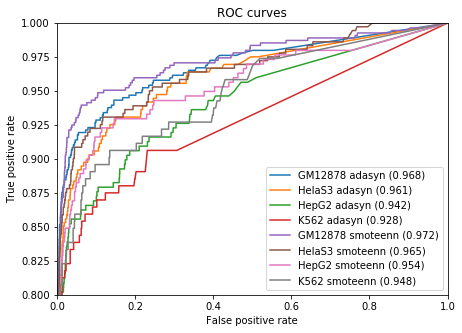

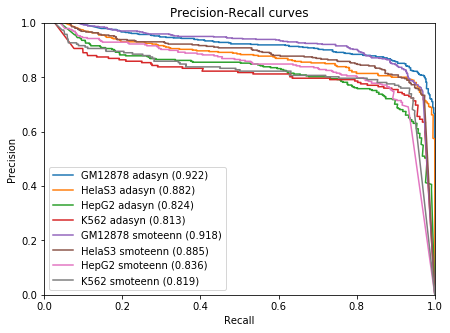

In [5]:
roc(results, 'AE-IE_2layers_150_roc.pdf')
pr(results, 'AE-IE_2layers_150_pr.pdf')

### Adasyn accuracy

In [6]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-E","I-E"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-E       I-E
GM12878  0.979378  0.855311  0.991344
HelaS3   0.979577  0.814404  0.988829
HepG2    0.978210  0.802013  0.985811
K562     0.990791  0.755208  0.997378

### SMOTEENN accuracy

In [7]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-E","I-E"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-E       I-E
GM12878  0.970356  0.902930  0.976859
HelaS3   0.966059  0.878116  0.970985
HepG2    0.965302  0.848993  0.970320
K562     0.983423  0.807292  0.988348

## Benchmarks with the first MLP (4 layers (64, 128, 128, 64))

In [8]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

...building the mlp...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                6528      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

36056/36056 [==============================] - 1s 25us/step - loss: 0.0459 - acc: 0.9859 - auc_acc: 0.9877 - f1_acc: 0.9859 - precision_acc: 0.9794 - recall_acc: 0.9926 - val_loss: 0.1105 - val_acc: 0.9724 - val_auc_acc: 0.9879 - val_f1_acc: 0.8694 - val_precision_acc: 0.8327 - val_recall_acc: 0.9214
Epoch 49/150
36056/36056 [==============================] - 1s 25us/step - loss: 0.0423 - acc: 0.9877 - auc_acc: 0.9880 - f1_acc: 0.9877 - precision_acc: 0.9812 - recall_acc: 0.9946 - val_loss: 0.1104 - val_acc: 0.9748 - val_auc_acc: 0.9882 - val_f1_acc: 0.8796 - val_precision_acc: 0.8538 - val_recall_acc: 0.9167
Epoch 50/150
36056/36056 [==============================] - 1s 24us/step - loss: 0.0417 - acc: 0.9875 - auc_acc: 0.9883 - f1_acc: 0.9875 - precision_acc: 0.9818 - recall_acc: 0.9935 - val_loss: 0.1153 - val_acc: 0.9730 - val_auc_acc: 0.9884 - val_f1_acc: 0.8717 - val_precision_acc: 0.8348 - val_recall_acc: 0.9236
Epoch 51/150
36056/36056 [==============================] - 1s 24us/

36056/36056 [==============================] - 1s 21us/step - loss: 0.0145 - acc: 0.9961 - auc_acc: 0.9947 - f1_acc: 0.9961 - precision_acc: 0.9942 - recall_acc: 0.9979 - val_loss: 0.1319 - val_acc: 0.9795 - val_auc_acc: 0.9947 - val_f1_acc: 0.8980 - val_precision_acc: 0.8961 - val_recall_acc: 0.9100
Epoch 101/150
36056/36056 [==============================] - 1s 22us/step - loss: 0.0170 - acc: 0.9949 - auc_acc: 0.9947 - f1_acc: 0.9949 - precision_acc: 0.9923 - recall_acc: 0.9975 - val_loss: 0.1324 - val_acc: 0.9801 - val_auc_acc: 0.9947 - val_f1_acc: 0.8999 - val_precision_acc: 0.8994 - val_recall_acc: 0.9103
Epoch 102/150
36056/36056 [==============================] - 1s 24us/step - loss: 0.0142 - acc: 0.9957 - auc_acc: 0.9948 - f1_acc: 0.9957 - precision_acc: 0.9936 - recall_acc: 0.9979 - val_loss: 0.1347 - val_acc: 0.9803 - val_auc_acc: 0.9948 - val_f1_acc: 0.9003 - val_precision_acc: 0.9018 - val_recall_acc: 0.9085
Epoch 103/150
36056/36056 [==============================] - 1s 24

Epoch 126/150
36056/36056 [==============================] - 1s 27us/step - loss: 0.0112 - acc: 0.9971 - auc_acc: 0.9958 - f1_acc: 0.9970 - precision_acc: 0.9957 - recall_acc: 0.9983 - val_loss: 0.1315 - val_acc: 0.9829 - val_auc_acc: 0.9958 - val_f1_acc: 0.9133 - val_precision_acc: 0.9238 - val_recall_acc: 0.9116
Epoch 127/150
36056/36056 [==============================] - 1s 26us/step - loss: 0.0118 - acc: 0.9969 - auc_acc: 0.9958 - f1_acc: 0.9969 - precision_acc: 0.9952 - recall_acc: 0.9987 - val_loss: 0.1352 - val_acc: 0.9801 - val_auc_acc: 0.9958 - val_f1_acc: 0.8993 - val_precision_acc: 0.8975 - val_recall_acc: 0.9132
Epoch 128/150
36056/36056 [==============================] - 1s 27us/step - loss: 0.0124 - acc: 0.9968 - auc_acc: 0.9959 - f1_acc: 0.9968 - precision_acc: 0.9950 - recall_acc: 0.9985 - val_loss: 0.1334 - val_acc: 0.9833 - val_auc_acc: 0.9959 - val_f1_acc: 0.9145 - val_precision_acc: 0.9262 - val_recall_acc: 0.9112
Epoch 129/150
36056/36056 [=========================

Train on 41213 samples, validate on 5444 samples
Epoch 1/150
41213/41213 [==============================] - 2s 44us/step - loss: 0.5313 - acc: 0.7230 - auc_acc: 0.7574 - f1_acc: 0.7298 - precision_acc: 0.7443 - recall_acc: 0.7390 - val_loss: 0.4285 - val_acc: 0.8944 - val_auc_acc: 0.8215 - val_f1_acc: 0.4909 - val_precision_acc: 0.3428 - val_recall_acc: 0.9104
Epoch 2/150
41213/41213 [==============================] - 1s 24us/step - loss: 0.4412 - acc: 0.7965 - auc_acc: 0.8389 - f1_acc: 0.7738 - precision_acc: 0.8642 - recall_acc: 0.7030 - val_loss: 0.3388 - val_acc: 0.9135 - val_auc_acc: 0.8501 - val_f1_acc: 0.5357 - val_precision_acc: 0.3883 - val_recall_acc: 0.9042
Epoch 3/150
41213/41213 [==============================] - 1s 20us/step - loss: 0.4123 - acc: 0.8140 - auc_acc: 0.8589 - f1_acc: 0.7962 - precision_acc: 0.8746 - recall_acc: 0.7329 - val_loss: 0.3150 - val_acc: 0.9102 - val_auc_acc: 0.8662 - val_f1_acc: 0.5260 - val_precision_acc: 0.3792 - val_recall_acc: 0.9043
Epoch 4/1

Epoch 27/150
41213/41213 [==============================] - 1s 25us/step - loss: 0.1238 - acc: 0.9594 - auc_acc: 0.9613 - f1_acc: 0.9599 - precision_acc: 0.9419 - recall_acc: 0.9793 - val_loss: 0.1749 - val_acc: 0.9478 - val_auc_acc: 0.9621 - val_f1_acc: 0.6423 - val_precision_acc: 0.5289 - val_recall_acc: 0.8618
Epoch 28/150
41213/41213 [==============================] - 1s 26us/step - loss: 0.1166 - acc: 0.9604 - auc_acc: 0.9628 - f1_acc: 0.9607 - precision_acc: 0.9429 - recall_acc: 0.9799 - val_loss: 0.1854 - val_acc: 0.9440 - val_auc_acc: 0.9635 - val_f1_acc: 0.6301 - val_precision_acc: 0.5099 - val_recall_acc: 0.8729
Epoch 29/150
41213/41213 [==============================] - 1s 25us/step - loss: 0.1160 - acc: 0.9622 - auc_acc: 0.9641 - f1_acc: 0.9626 - precision_acc: 0.9454 - recall_acc: 0.9810 - val_loss: 0.1766 - val_acc: 0.9484 - val_auc_acc: 0.9647 - val_f1_acc: 0.6458 - val_precision_acc: 0.5307 - val_recall_acc: 0.8681
Epoch 30/150
41213/41213 [=============================

41213/41213 [==============================] - 1s 23us/step - loss: 0.0533 - acc: 0.9848 - auc_acc: 0.9817 - f1_acc: 0.9848 - precision_acc: 0.9759 - recall_acc: 0.9941 - val_loss: 0.1640 - val_acc: 0.9673 - val_auc_acc: 0.9819 - val_f1_acc: 0.7316 - val_precision_acc: 0.6788 - val_recall_acc: 0.8306
Epoch 54/150
41213/41213 [==============================] - 1s 24us/step - loss: 0.0546 - acc: 0.9845 - auc_acc: 0.9821 - f1_acc: 0.9843 - precision_acc: 0.9750 - recall_acc: 0.9942 - val_loss: 0.1679 - val_acc: 0.9647 - val_auc_acc: 0.9822 - val_f1_acc: 0.7214 - val_precision_acc: 0.6552 - val_recall_acc: 0.8438
Epoch 55/150
41213/41213 [==============================] - 1s 26us/step - loss: 0.0526 - acc: 0.9846 - auc_acc: 0.9824 - f1_acc: 0.9848 - precision_acc: 0.9759 - recall_acc: 0.9940 - val_loss: 0.1641 - val_acc: 0.9679 - val_auc_acc: 0.9826 - val_f1_acc: 0.7373 - val_precision_acc: 0.6862 - val_recall_acc: 0.8354
Epoch 56/150
41213/41213 [==============================] - 1s 25us/

41213/41213 [==============================] - 1s 28us/step - loss: 0.0250 - acc: 0.9932 - auc_acc: 0.9915 - f1_acc: 0.9932 - precision_acc: 0.9887 - recall_acc: 0.9978 - val_loss: 0.1777 - val_acc: 0.9754 - val_auc_acc: 0.9916 - val_f1_acc: 0.7803 - val_precision_acc: 0.7738 - val_recall_acc: 0.8174
Epoch 106/150
41213/41213 [==============================] - 1s 23us/step - loss: 0.0257 - acc: 0.9928 - auc_acc: 0.9916 - f1_acc: 0.9928 - precision_acc: 0.9885 - recall_acc: 0.9974 - val_loss: 0.1797 - val_acc: 0.9752 - val_auc_acc: 0.9917 - val_f1_acc: 0.7740 - val_precision_acc: 0.7697 - val_recall_acc: 0.8041
Epoch 107/150
41213/41213 [==============================] - 1s 24us/step - loss: 0.0262 - acc: 0.9929 - auc_acc: 0.9917 - f1_acc: 0.9929 - precision_acc: 0.9888 - recall_acc: 0.9973 - val_loss: 0.1755 - val_acc: 0.9754 - val_auc_acc: 0.9917 - val_f1_acc: 0.7822 - val_precision_acc: 0.7753 - val_recall_acc: 0.8206
Epoch 108/150
41213/41213 [==============================] - 1s 25

Epoch 131/150
41213/41213 [==============================] - 1s 24us/step - loss: 0.0214 - acc: 0.9940 - auc_acc: 0.9932 - f1_acc: 0.9939 - precision_acc: 0.9902 - recall_acc: 0.9977 - val_loss: 0.1861 - val_acc: 0.9754 - val_auc_acc: 0.9933 - val_f1_acc: 0.7813 - val_precision_acc: 0.7767 - val_recall_acc: 0.8188
Epoch 132/150
41213/41213 [==============================] - 1s 26us/step - loss: 0.0220 - acc: 0.9939 - auc_acc: 0.9933 - f1_acc: 0.9939 - precision_acc: 0.9905 - recall_acc: 0.9975 - val_loss: 0.1824 - val_acc: 0.9739 - val_auc_acc: 0.9933 - val_f1_acc: 0.7647 - val_precision_acc: 0.7470 - val_recall_acc: 0.8098
Epoch 133/150
41213/41213 [==============================] - 1s 26us/step - loss: 0.0219 - acc: 0.9941 - auc_acc: 0.9933 - f1_acc: 0.9941 - precision_acc: 0.9906 - recall_acc: 0.9978 - val_loss: 0.1813 - val_acc: 0.9748 - val_auc_acc: 0.9934 - val_f1_acc: 0.7718 - val_precision_acc: 0.7710 - val_recall_acc: 0.8006
Epoch 134/150
41213/41213 [=========================

44165/44165 [==============================] - 1s 28us/step - loss: 0.1025 - acc: 0.9657 - auc_acc: 0.9701 - f1_acc: 0.9659 - precision_acc: 0.9523 - recall_acc: 0.9805 - val_loss: 0.1195 - val_acc: 0.9606 - val_auc_acc: 0.9707 - val_f1_acc: 0.6377 - val_precision_acc: 0.5200 - val_recall_acc: 0.8788
Epoch 29/150
44165/44165 [==============================] - 1s 28us/step - loss: 0.0996 - acc: 0.9676 - auc_acc: 0.9712 - f1_acc: 0.9677 - precision_acc: 0.9552 - recall_acc: 0.9811 - val_loss: 0.1438 - val_acc: 0.9504 - val_auc_acc: 0.9717 - val_f1_acc: 0.5888 - val_precision_acc: 0.4587 - val_recall_acc: 0.8816
Epoch 30/150
44165/44165 [==============================] - 1s 30us/step - loss: 0.0948 - acc: 0.9697 - auc_acc: 0.9722 - f1_acc: 0.9698 - precision_acc: 0.9569 - recall_acc: 0.9835 - val_loss: 0.1492 - val_acc: 0.9493 - val_auc_acc: 0.9727 - val_f1_acc: 0.5822 - val_precision_acc: 0.4517 - val_recall_acc: 0.8820
Epoch 31/150
44165/44165 [==============================] - 1s 27us/

44165/44165 [==============================] - 1s 29us/step - loss: 0.0314 - acc: 0.9914 - auc_acc: 0.9905 - f1_acc: 0.9914 - precision_acc: 0.9860 - recall_acc: 0.9969 - val_loss: 0.1261 - val_acc: 0.9750 - val_auc_acc: 0.9905 - val_f1_acc: 0.7189 - val_precision_acc: 0.6756 - val_recall_acc: 0.8131
Epoch 81/150
44165/44165 [==============================] - 1s 31us/step - loss: 0.0316 - acc: 0.9909 - auc_acc: 0.9906 - f1_acc: 0.9909 - precision_acc: 0.9853 - recall_acc: 0.9967 - val_loss: 0.1270 - val_acc: 0.9738 - val_auc_acc: 0.9907 - val_f1_acc: 0.7129 - val_precision_acc: 0.6604 - val_recall_acc: 0.8225
Epoch 82/150
44165/44165 [==============================] - 1s 28us/step - loss: 0.0301 - acc: 0.9916 - auc_acc: 0.9907 - f1_acc: 0.9916 - precision_acc: 0.9868 - recall_acc: 0.9967 - val_loss: 0.1330 - val_acc: 0.9735 - val_auc_acc: 0.9908 - val_f1_acc: 0.7107 - val_precision_acc: 0.6520 - val_recall_acc: 0.8288
Epoch 83/150
44165/44165 [==============================] - 1s 29us/

44165/44165 [==============================] - 1s 27us/step - loss: 0.0237 - acc: 0.9938 - auc_acc: 0.9929 - f1_acc: 0.9938 - precision_acc: 0.9897 - recall_acc: 0.9980 - val_loss: 0.1292 - val_acc: 0.9774 - val_auc_acc: 0.9930 - val_f1_acc: 0.7356 - val_precision_acc: 0.7119 - val_recall_acc: 0.8027
Epoch 107/150
44165/44165 [==============================] - 1s 27us/step - loss: 0.0233 - acc: 0.9938 - auc_acc: 0.9930 - f1_acc: 0.9938 - precision_acc: 0.9899 - recall_acc: 0.9979 - val_loss: 0.1318 - val_acc: 0.9754 - val_auc_acc: 0.9930 - val_f1_acc: 0.7162 - val_precision_acc: 0.6839 - val_recall_acc: 0.7997
Epoch 108/150
44165/44165 [==============================] - 1s 28us/step - loss: 0.0230 - acc: 0.9939 - auc_acc: 0.9931 - f1_acc: 0.9939 - precision_acc: 0.9897 - recall_acc: 0.9982 - val_loss: 0.1339 - val_acc: 0.9745 - val_auc_acc: 0.9931 - val_f1_acc: 0.7153 - val_precision_acc: 0.6703 - val_recall_acc: 0.8168
Epoch 109/150
44165/44165 [==============================] - 1s 27

Epoch 132/150
44165/44165 [==============================] - 1s 23us/step - loss: 0.0191 - acc: 0.9950 - auc_acc: 0.9943 - f1_acc: 0.9950 - precision_acc: 0.9920 - recall_acc: 0.9981 - val_loss: 0.1360 - val_acc: 0.9768 - val_auc_acc: 0.9944 - val_f1_acc: 0.7194 - val_precision_acc: 0.7034 - val_recall_acc: 0.7847
Epoch 133/150
44165/44165 [==============================] - 1s 24us/step - loss: 0.0198 - acc: 0.9949 - auc_acc: 0.9944 - f1_acc: 0.9948 - precision_acc: 0.9915 - recall_acc: 0.9982 - val_loss: 0.1331 - val_acc: 0.9794 - val_auc_acc: 0.9944 - val_f1_acc: 0.7409 - val_precision_acc: 0.7473 - val_recall_acc: 0.7810
Epoch 134/150
44165/44165 [==============================] - 1s 23us/step - loss: 0.0188 - acc: 0.9951 - auc_acc: 0.9944 - f1_acc: 0.9950 - precision_acc: 0.9921 - recall_acc: 0.9980 - val_loss: 0.1328 - val_acc: 0.9776 - val_auc_acc: 0.9944 - val_f1_acc: 0.7263 - val_precision_acc: 0.7194 - val_recall_acc: 0.7830
Epoch 135/150
44165/44165 [=========================

44088/44088 [==============================] - 1s 26us/step - loss: 0.0220 - acc: 0.9944 - auc_acc: 0.9930 - f1_acc: 0.9944 - precision_acc: 0.9912 - recall_acc: 0.9977 - val_loss: 0.0619 - val_acc: 0.9887 - val_auc_acc: 0.9932 - val_f1_acc: 0.7477 - val_precision_acc: 0.6846 - val_recall_acc: 0.8712
Epoch 30/150
44088/44088 [==============================] - 1s 24us/step - loss: 0.0207 - acc: 0.9950 - auc_acc: 0.9933 - f1_acc: 0.9950 - precision_acc: 0.9921 - recall_acc: 0.9981 - val_loss: 0.0570 - val_acc: 0.9881 - val_auc_acc: 0.9935 - val_f1_acc: 0.7375 - val_precision_acc: 0.6738 - val_recall_acc: 0.8736
Epoch 31/150
44088/44088 [==============================] - 1s 28us/step - loss: 0.0194 - acc: 0.9953 - auc_acc: 0.9936 - f1_acc: 0.9953 - precision_acc: 0.9925 - recall_acc: 0.9982 - val_loss: 0.0542 - val_acc: 0.9901 - val_auc_acc: 0.9938 - val_f1_acc: 0.7684 - val_precision_acc: 0.7382 - val_recall_acc: 0.8680
Epoch 32/150
44088/44088 [==============================] - 2s 35us/

44088/44088 [==============================] - 1s 24us/step - loss: 0.0043 - acc: 0.9991 - auc_acc: 0.9980 - f1_acc: 0.9991 - precision_acc: 0.9984 - recall_acc: 0.9998 - val_loss: 0.0642 - val_acc: 0.9924 - val_auc_acc: 0.9981 - val_f1_acc: 0.8146 - val_precision_acc: 0.8199 - val_recall_acc: 0.8543
Epoch 82/150
44088/44088 [==============================] - 1s 33us/step - loss: 0.0045 - acc: 0.9990 - auc_acc: 0.9981 - f1_acc: 0.9990 - precision_acc: 0.9981 - recall_acc: 0.9999 - val_loss: 0.0626 - val_acc: 0.9920 - val_auc_acc: 0.9981 - val_f1_acc: 0.8032 - val_precision_acc: 0.8241 - val_recall_acc: 0.8430
Epoch 83/150
44088/44088 [==============================] - 1s 33us/step - loss: 0.0044 - acc: 0.9991 - auc_acc: 0.9981 - f1_acc: 0.9991 - precision_acc: 0.9986 - recall_acc: 0.9996 - val_loss: 0.0619 - val_acc: 0.9926 - val_auc_acc: 0.9981 - val_f1_acc: 0.8109 - val_precision_acc: 0.8218 - val_recall_acc: 0.8430
Epoch 84/150
44088/44088 [==============================] - 1s 24us/

44088/44088 [==============================] - 1s 30us/step - loss: 0.0032 - acc: 0.9994 - auc_acc: 0.9985 - f1_acc: 0.9994 - precision_acc: 0.9990 - recall_acc: 0.9998 - val_loss: 0.0683 - val_acc: 0.9927 - val_auc_acc: 0.9985 - val_f1_acc: 0.8142 - val_precision_acc: 0.8326 - val_recall_acc: 0.8347
Epoch 108/150
44088/44088 [==============================] - 1s 28us/step - loss: 0.0028 - acc: 0.9994 - auc_acc: 0.9985 - f1_acc: 0.9994 - precision_acc: 0.9990 - recall_acc: 0.9998 - val_loss: 0.0670 - val_acc: 0.9924 - val_auc_acc: 0.9985 - val_f1_acc: 0.8197 - val_precision_acc: 0.8301 - val_recall_acc: 0.8506
Epoch 109/150
44088/44088 [==============================] - 1s 30us/step - loss: 0.0037 - acc: 0.9993 - auc_acc: 0.9985 - f1_acc: 0.9993 - precision_acc: 0.9988 - recall_acc: 0.9998 - val_loss: 0.0685 - val_acc: 0.9911 - val_auc_acc: 0.9985 - val_f1_acc: 0.7960 - val_precision_acc: 0.7765 - val_recall_acc: 0.8562
Epoch 110/150
44088/44088 [==============================] - 1s 31

Epoch 133/150
44088/44088 [==============================] - 1s 23us/step - loss: 0.0024 - acc: 0.9995 - auc_acc: 0.9987 - f1_acc: 0.9995 - precision_acc: 0.9992 - recall_acc: 0.9998 - val_loss: 0.0689 - val_acc: 0.9926 - val_auc_acc: 0.9987 - val_f1_acc: 0.8069 - val_precision_acc: 0.8345 - val_recall_acc: 0.8234
Epoch 134/150
44088/44088 [==============================] - 1s 27us/step - loss: 0.0023 - acc: 0.9995 - auc_acc: 0.9987 - f1_acc: 0.9995 - precision_acc: 0.9992 - recall_acc: 0.9997 - val_loss: 0.0684 - val_acc: 0.9933 - val_auc_acc: 0.9988 - val_f1_acc: 0.8226 - val_precision_acc: 0.8428 - val_recall_acc: 0.8392
Epoch 135/150
44088/44088 [==============================] - 1s 25us/step - loss: 0.0020 - acc: 0.9996 - auc_acc: 0.9988 - f1_acc: 0.9996 - precision_acc: 0.9994 - recall_acc: 0.9999 - val_loss: 0.0717 - val_acc: 0.9927 - val_auc_acc: 0.9988 - val_f1_acc: 0.8130 - val_precision_acc: 0.8383 - val_recall_acc: 0.8279
Epoch 136/150
44088/44088 [=========================

32449/32449 [==============================] - 1s 28us/step - loss: 0.0756 - acc: 0.9742 - auc_acc: 0.9887 - f1_acc: 0.9762 - precision_acc: 0.9895 - recall_acc: 0.9637 - val_loss: 0.1649 - val_acc: 0.9595 - val_auc_acc: 0.9888 - val_f1_acc: 0.8246 - val_precision_acc: 0.7316 - val_recall_acc: 0.9589
Epoch 31/150
32449/32449 [==============================] - 1s 27us/step - loss: 0.0745 - acc: 0.9747 - auc_acc: 0.9889 - f1_acc: 0.9768 - precision_acc: 0.9895 - recall_acc: 0.9646 - val_loss: 0.1502 - val_acc: 0.9640 - val_auc_acc: 0.9890 - val_f1_acc: 0.8395 - val_precision_acc: 0.7570 - val_recall_acc: 0.9558
Epoch 32/150
32449/32449 [==============================] - 1s 28us/step - loss: 0.0742 - acc: 0.9749 - auc_acc: 0.9890 - f1_acc: 0.9771 - precision_acc: 0.9905 - recall_acc: 0.9643 - val_loss: 0.1689 - val_acc: 0.9597 - val_auc_acc: 0.9891 - val_f1_acc: 0.8242 - val_precision_acc: 0.7325 - val_recall_acc: 0.9574
Epoch 33/150
32449/32449 [==============================] - 1s 30us/

32449/32449 [==============================] - 1s 32us/step - loss: 0.0355 - acc: 0.9848 - auc_acc: 0.9941 - f1_acc: 0.9861 - precision_acc: 0.9928 - recall_acc: 0.9797 - val_loss: 0.1662 - val_acc: 0.9666 - val_auc_acc: 0.9942 - val_f1_acc: 0.8458 - val_precision_acc: 0.7735 - val_recall_acc: 0.9441
Epoch 83/150
32449/32449 [==============================] - 1s 32us/step - loss: 0.0344 - acc: 0.9857 - auc_acc: 0.9942 - f1_acc: 0.9870 - precision_acc: 0.9937 - recall_acc: 0.9806 - val_loss: 0.1595 - val_acc: 0.9672 - val_auc_acc: 0.9942 - val_f1_acc: 0.8479 - val_precision_acc: 0.7792 - val_recall_acc: 0.9418
Epoch 84/150
32449/32449 [==============================] - 1s 31us/step - loss: 0.0343 - acc: 0.9856 - auc_acc: 0.9943 - f1_acc: 0.9867 - precision_acc: 0.9928 - recall_acc: 0.9809 - val_loss: 0.1609 - val_acc: 0.9662 - val_auc_acc: 0.9943 - val_f1_acc: 0.8440 - val_precision_acc: 0.7730 - val_recall_acc: 0.9418
Epoch 85/150
32449/32449 [==============================] - 1s 34us/

32449/32449 [==============================] - 1s 30us/step - loss: 0.0233 - acc: 0.9922 - auc_acc: 0.9954 - f1_acc: 0.9929 - precision_acc: 0.9939 - recall_acc: 0.9921 - val_loss: 0.1668 - val_acc: 0.9682 - val_auc_acc: 0.9954 - val_f1_acc: 0.8517 - val_precision_acc: 0.7837 - val_recall_acc: 0.9441
Epoch 109/150
32449/32449 [==============================] - 1s 29us/step - loss: 0.0215 - acc: 0.9922 - auc_acc: 0.9954 - f1_acc: 0.9929 - precision_acc: 0.9938 - recall_acc: 0.9920 - val_loss: 0.1645 - val_acc: 0.9688 - val_auc_acc: 0.9955 - val_f1_acc: 0.8535 - val_precision_acc: 0.7914 - val_recall_acc: 0.9378
Epoch 110/150
32449/32449 [==============================] - 1s 26us/step - loss: 0.0205 - acc: 0.9931 - auc_acc: 0.9955 - f1_acc: 0.9937 - precision_acc: 0.9940 - recall_acc: 0.9935 - val_loss: 0.1655 - val_acc: 0.9686 - val_auc_acc: 0.9955 - val_f1_acc: 0.8531 - val_precision_acc: 0.7913 - val_recall_acc: 0.9378
Epoch 111/150
32449/32449 [==============================] - 1s 27

Epoch 134/150
32449/32449 [==============================] - 1s 33us/step - loss: 0.0142 - acc: 0.9960 - auc_acc: 0.9962 - f1_acc: 0.9964 - precision_acc: 0.9961 - recall_acc: 0.9967 - val_loss: 0.1780 - val_acc: 0.9678 - val_auc_acc: 0.9962 - val_f1_acc: 0.8499 - val_precision_acc: 0.7876 - val_recall_acc: 0.9365
Epoch 135/150
32449/32449 [==============================] - 1s 35us/step - loss: 0.0146 - acc: 0.9963 - auc_acc: 0.9962 - f1_acc: 0.9966 - precision_acc: 0.9964 - recall_acc: 0.9969 - val_loss: 0.1724 - val_acc: 0.9672 - val_auc_acc: 0.9962 - val_f1_acc: 0.8466 - val_precision_acc: 0.7804 - val_recall_acc: 0.9365
Epoch 136/150
32449/32449 [==============================] - 1s 28us/step - loss: 0.0154 - acc: 0.9952 - auc_acc: 0.9962 - f1_acc: 0.9956 - precision_acc: 0.9948 - recall_acc: 0.9964 - val_loss: 0.1673 - val_acc: 0.9694 - val_auc_acc: 0.9963 - val_f1_acc: 0.8562 - val_precision_acc: 0.7963 - val_recall_acc: 0.9387
Epoch 137/150
32449/32449 [=========================

36951/36951 [==============================] - 1s 25us/step - loss: 0.1180 - acc: 0.9535 - auc_acc: 0.9788 - f1_acc: 0.9573 - precision_acc: 0.9744 - recall_acc: 0.9414 - val_loss: 0.1932 - val_acc: 0.9434 - val_auc_acc: 0.9790 - val_f1_acc: 0.6312 - val_precision_acc: 0.5043 - val_recall_acc: 0.8909
Epoch 32/150
36951/36951 [==============================] - 1s 30us/step - loss: 0.1146 - acc: 0.9553 - auc_acc: 0.9792 - f1_acc: 0.9589 - precision_acc: 0.9748 - recall_acc: 0.9440 - val_loss: 0.1956 - val_acc: 0.9418 - val_auc_acc: 0.9794 - val_f1_acc: 0.6242 - val_precision_acc: 0.4964 - val_recall_acc: 0.8909
Epoch 33/150
36951/36951 [==============================] - 1s 26us/step - loss: 0.1133 - acc: 0.9556 - auc_acc: 0.9796 - f1_acc: 0.9594 - precision_acc: 0.9737 - recall_acc: 0.9459 - val_loss: 0.1949 - val_acc: 0.9431 - val_auc_acc: 0.9798 - val_f1_acc: 0.6281 - val_precision_acc: 0.5022 - val_recall_acc: 0.8862
Epoch 34/150
36951/36951 [==============================] - 1s 29us/

36951/36951 [==============================] - 1s 21us/step - loss: 0.0411 - acc: 0.9854 - auc_acc: 0.9910 - f1_acc: 0.9868 - precision_acc: 0.9838 - recall_acc: 0.9900 - val_loss: 0.1767 - val_acc: 0.9497 - val_auc_acc: 0.9911 - val_f1_acc: 0.6549 - val_precision_acc: 0.5415 - val_recall_acc: 0.8762
Epoch 84/150
36951/36951 [==============================] - 1s 21us/step - loss: 0.0383 - acc: 0.9863 - auc_acc: 0.9911 - f1_acc: 0.9876 - precision_acc: 0.9845 - recall_acc: 0.9909 - val_loss: 0.1774 - val_acc: 0.9510 - val_auc_acc: 0.9912 - val_f1_acc: 0.6599 - val_precision_acc: 0.5499 - val_recall_acc: 0.8726
Epoch 85/150
36951/36951 [==============================] - 1s 24us/step - loss: 0.0380 - acc: 0.9867 - auc_acc: 0.9912 - f1_acc: 0.9880 - precision_acc: 0.9848 - recall_acc: 0.9915 - val_loss: 0.1800 - val_acc: 0.9517 - val_auc_acc: 0.9913 - val_f1_acc: 0.6637 - val_precision_acc: 0.5529 - val_recall_acc: 0.8748
Epoch 86/150
36951/36951 [==============================] - 1s 22us/

36951/36951 [==============================] - 1s 20us/step - loss: 0.0263 - acc: 0.9913 - auc_acc: 0.9933 - f1_acc: 0.9921 - precision_acc: 0.9895 - recall_acc: 0.9949 - val_loss: 0.1669 - val_acc: 0.9611 - val_auc_acc: 0.9933 - val_f1_acc: 0.7028 - val_precision_acc: 0.6181 - val_recall_acc: 0.8596
Epoch 110/150
36951/36951 [==============================] - 1s 19us/step - loss: 0.0255 - acc: 0.9918 - auc_acc: 0.9934 - f1_acc: 0.9926 - precision_acc: 0.9900 - recall_acc: 0.9953 - val_loss: 0.1727 - val_acc: 0.9581 - val_auc_acc: 0.9934 - val_f1_acc: 0.6933 - val_precision_acc: 0.5989 - val_recall_acc: 0.8725
Epoch 111/150
36951/36951 [==============================] - 1s 21us/step - loss: 0.0253 - acc: 0.9915 - auc_acc: 0.9934 - f1_acc: 0.9923 - precision_acc: 0.9896 - recall_acc: 0.9953 - val_loss: 0.1686 - val_acc: 0.9594 - val_auc_acc: 0.9934 - val_f1_acc: 0.6970 - val_precision_acc: 0.6054 - val_recall_acc: 0.8665
Epoch 112/150
36951/36951 [==============================] - 1s 20

Epoch 135/150
36951/36951 [==============================] - 1s 22us/step - loss: 0.0193 - acc: 0.9943 - auc_acc: 0.9946 - f1_acc: 0.9949 - precision_acc: 0.9926 - recall_acc: 0.9972 - val_loss: 0.1700 - val_acc: 0.9645 - val_auc_acc: 0.9946 - val_f1_acc: 0.7232 - val_precision_acc: 0.6440 - val_recall_acc: 0.8632
Epoch 136/150
36951/36951 [==============================] - 1s 20us/step - loss: 0.0200 - acc: 0.9934 - auc_acc: 0.9946 - f1_acc: 0.9941 - precision_acc: 0.9919 - recall_acc: 0.9964 - val_loss: 0.1777 - val_acc: 0.9589 - val_auc_acc: 0.9947 - val_f1_acc: 0.6949 - val_precision_acc: 0.6009 - val_recall_acc: 0.8679
Epoch 137/150
36951/36951 [==============================] - 1s 20us/step - loss: 0.0199 - acc: 0.9939 - auc_acc: 0.9947 - f1_acc: 0.9945 - precision_acc: 0.9921 - recall_acc: 0.9970 - val_loss: 0.1733 - val_acc: 0.9614 - val_auc_acc: 0.9947 - val_f1_acc: 0.7061 - val_precision_acc: 0.6219 - val_recall_acc: 0.8606
Epoch 138/150
36951/36951 [=========================

40171/40171 [==============================] - 1s 20us/step - loss: 0.0773 - acc: 0.9721 - auc_acc: 0.9859 - f1_acc: 0.9745 - precision_acc: 0.9785 - recall_acc: 0.9708 - val_loss: 0.1857 - val_acc: 0.9483 - val_auc_acc: 0.9861 - val_f1_acc: 0.5671 - val_precision_acc: 0.4378 - val_recall_acc: 0.8553
Epoch 33/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0761 - acc: 0.9727 - auc_acc: 0.9862 - f1_acc: 0.9751 - precision_acc: 0.9789 - recall_acc: 0.9716 - val_loss: 0.2030 - val_acc: 0.9415 - val_auc_acc: 0.9864 - val_f1_acc: 0.5413 - val_precision_acc: 0.4098 - val_recall_acc: 0.8609
Epoch 34/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0709 - acc: 0.9741 - auc_acc: 0.9866 - f1_acc: 0.9762 - precision_acc: 0.9792 - recall_acc: 0.9737 - val_loss: 0.1948 - val_acc: 0.9448 - val_auc_acc: 0.9867 - val_f1_acc: 0.5526 - val_precision_acc: 0.4242 - val_recall_acc: 0.8553
Epoch 35/150
40171/40171 [==============================] - 1s 21us/

40171/40171 [==============================] - 1s 21us/step - loss: 0.0210 - acc: 0.9934 - auc_acc: 0.9942 - f1_acc: 0.9939 - precision_acc: 0.9923 - recall_acc: 0.9957 - val_loss: 0.1794 - val_acc: 0.9629 - val_auc_acc: 0.9942 - val_f1_acc: 0.6438 - val_precision_acc: 0.5356 - val_recall_acc: 0.8516
Epoch 85/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0211 - acc: 0.9931 - auc_acc: 0.9942 - f1_acc: 0.9937 - precision_acc: 0.9918 - recall_acc: 0.9957 - val_loss: 0.1682 - val_acc: 0.9651 - val_auc_acc: 0.9943 - val_f1_acc: 0.6557 - val_precision_acc: 0.5549 - val_recall_acc: 0.8440
Epoch 86/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0194 - acc: 0.9940 - auc_acc: 0.9943 - f1_acc: 0.9945 - precision_acc: 0.9929 - recall_acc: 0.9961 - val_loss: 0.1788 - val_acc: 0.9613 - val_auc_acc: 0.9943 - val_f1_acc: 0.6325 - val_precision_acc: 0.5209 - val_recall_acc: 0.8509
Epoch 87/150
40171/40171 [==============================] - 1s 19us/

40171/40171 [==============================] - 1s 22us/step - loss: 0.0144 - acc: 0.9958 - auc_acc: 0.9954 - f1_acc: 0.9962 - precision_acc: 0.9949 - recall_acc: 0.9976 - val_loss: 0.1767 - val_acc: 0.9670 - val_auc_acc: 0.9954 - val_f1_acc: 0.6728 - val_precision_acc: 0.5771 - val_recall_acc: 0.8516
Epoch 111/150
40171/40171 [==============================] - 1s 21us/step - loss: 0.0134 - acc: 0.9955 - auc_acc: 0.9955 - f1_acc: 0.9959 - precision_acc: 0.9944 - recall_acc: 0.9975 - val_loss: 0.1738 - val_acc: 0.9686 - val_auc_acc: 0.9955 - val_f1_acc: 0.6819 - val_precision_acc: 0.5937 - val_recall_acc: 0.8455
Epoch 112/150
40171/40171 [==============================] - 1s 22us/step - loss: 0.0130 - acc: 0.9960 - auc_acc: 0.9955 - f1_acc: 0.9963 - precision_acc: 0.9951 - recall_acc: 0.9976 - val_loss: 0.1758 - val_acc: 0.9670 - val_auc_acc: 0.9955 - val_f1_acc: 0.6664 - val_precision_acc: 0.5695 - val_recall_acc: 0.8479
Epoch 113/150
40171/40171 [==============================] - 1s 19

Epoch 136/150
40171/40171 [==============================] - 1s 20us/step - loss: 0.0114 - acc: 0.9967 - auc_acc: 0.9961 - f1_acc: 0.9970 - precision_acc: 0.9957 - recall_acc: 0.9983 - val_loss: 0.1732 - val_acc: 0.9710 - val_auc_acc: 0.9962 - val_f1_acc: 0.6922 - val_precision_acc: 0.6240 - val_recall_acc: 0.8304
Epoch 137/150
40171/40171 [==============================] - 1s 22us/step - loss: 0.0103 - acc: 0.9968 - auc_acc: 0.9962 - f1_acc: 0.9970 - precision_acc: 0.9956 - recall_acc: 0.9985 - val_loss: 0.1853 - val_acc: 0.9691 - val_auc_acc: 0.9962 - val_f1_acc: 0.6844 - val_precision_acc: 0.6014 - val_recall_acc: 0.8447
Epoch 138/150
40171/40171 [==============================] - 1s 21us/step - loss: 0.0106 - acc: 0.9971 - auc_acc: 0.9962 - f1_acc: 0.9973 - precision_acc: 0.9964 - recall_acc: 0.9983 - val_loss: 0.1808 - val_acc: 0.9688 - val_auc_acc: 0.9962 - val_f1_acc: 0.6829 - val_precision_acc: 0.5979 - val_recall_acc: 0.8455
Epoch 139/150
40171/40171 [=========================

37164/37164 [==============================] - 1s 23us/step - loss: 0.0194 - acc: 0.9946 - auc_acc: 0.9952 - f1_acc: 0.9955 - precision_acc: 0.9939 - recall_acc: 0.9972 - val_loss: 0.1238 - val_acc: 0.9711 - val_auc_acc: 0.9953 - val_f1_acc: 0.5851 - val_precision_acc: 0.4602 - val_recall_acc: 0.9158
Epoch 34/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0179 - acc: 0.9947 - auc_acc: 0.9953 - f1_acc: 0.9956 - precision_acc: 0.9944 - recall_acc: 0.9967 - val_loss: 0.1244 - val_acc: 0.9715 - val_auc_acc: 0.9954 - val_f1_acc: 0.5822 - val_precision_acc: 0.4586 - val_recall_acc: 0.9083
Epoch 35/150
37164/37164 [==============================] - 1s 22us/step - loss: 0.0176 - acc: 0.9952 - auc_acc: 0.9955 - f1_acc: 0.9959 - precision_acc: 0.9944 - recall_acc: 0.9974 - val_loss: 0.1417 - val_acc: 0.9710 - val_auc_acc: 0.9956 - val_f1_acc: 0.5838 - val_precision_acc: 0.4562 - val_recall_acc: 0.9215
Epoch 36/150
37164/37164 [==============================] - 1s 23us/

37164/37164 [==============================] - 1s 22us/step - loss: 0.0036 - acc: 0.9990 - auc_acc: 0.9980 - f1_acc: 0.9991 - precision_acc: 0.9989 - recall_acc: 0.9994 - val_loss: 0.1057 - val_acc: 0.9832 - val_auc_acc: 0.9980 - val_f1_acc: 0.6887 - val_precision_acc: 0.5907 - val_recall_acc: 0.9196
Epoch 86/150
37164/37164 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9993 - auc_acc: 0.9980 - f1_acc: 0.9994 - precision_acc: 0.9990 - recall_acc: 0.9997 - val_loss: 0.0982 - val_acc: 0.9839 - val_auc_acc: 0.9980 - val_f1_acc: 0.6942 - val_precision_acc: 0.6032 - val_recall_acc: 0.9158
Epoch 87/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0032 - acc: 0.9991 - auc_acc: 0.9980 - f1_acc: 0.9993 - precision_acc: 0.9989 - recall_acc: 0.9996 - val_loss: 0.0901 - val_acc: 0.9862 - val_auc_acc: 0.9980 - val_f1_acc: 0.7209 - val_precision_acc: 0.6600 - val_recall_acc: 0.8905
Epoch 88/150
37164/37164 [==============================] - 1s 23us/

37164/37164 [==============================] - 1s 22us/step - loss: 0.0023 - acc: 0.9995 - auc_acc: 0.9983 - f1_acc: 0.9996 - precision_acc: 0.9993 - recall_acc: 0.9998 - val_loss: 0.1092 - val_acc: 0.9841 - val_auc_acc: 0.9983 - val_f1_acc: 0.7010 - val_precision_acc: 0.6103 - val_recall_acc: 0.9158
Epoch 112/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0025 - acc: 0.9992 - auc_acc: 0.9983 - f1_acc: 0.9994 - precision_acc: 0.9990 - recall_acc: 0.9997 - val_loss: 0.1700 - val_acc: 0.9740 - val_auc_acc: 0.9983 - val_f1_acc: 0.6081 - val_precision_acc: 0.4864 - val_recall_acc: 0.9215
Epoch 113/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0035 - acc: 0.9989 - auc_acc: 0.9983 - f1_acc: 0.9991 - precision_acc: 0.9986 - recall_acc: 0.9996 - val_loss: 0.0923 - val_acc: 0.9860 - val_auc_acc: 0.9983 - val_f1_acc: 0.7262 - val_precision_acc: 0.6532 - val_recall_acc: 0.9126
Epoch 114/150
37164/37164 [==============================] - 1s 23

Epoch 137/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0031 - acc: 0.9993 - auc_acc: 0.9985 - f1_acc: 0.9994 - precision_acc: 0.9992 - recall_acc: 0.9996 - val_loss: 0.1074 - val_acc: 0.9851 - val_auc_acc: 0.9985 - val_f1_acc: 0.7129 - val_precision_acc: 0.6485 - val_recall_acc: 0.8929
Epoch 138/150
37164/37164 [==============================] - 1s 24us/step - loss: 0.0018 - acc: 0.9996 - auc_acc: 0.9985 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.1142 - val_acc: 0.9844 - val_auc_acc: 0.9985 - val_f1_acc: 0.7086 - val_precision_acc: 0.6252 - val_recall_acc: 0.9113
Epoch 139/150
37164/37164 [==============================] - 1s 23us/step - loss: 0.0016 - acc: 0.9996 - auc_acc: 0.9985 - f1_acc: 0.9997 - precision_acc: 0.9995 - recall_acc: 0.9999 - val_loss: 0.1112 - val_acc: 0.9849 - val_auc_acc: 0.9985 - val_f1_acc: 0.7166 - val_precision_acc: 0.6278 - val_recall_acc: 0.9183
Epoch 140/150
37164/37164 [=========================

## ROC and PR curves

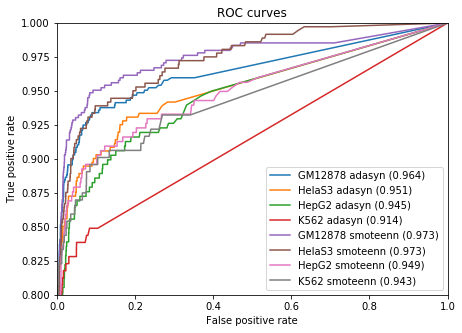

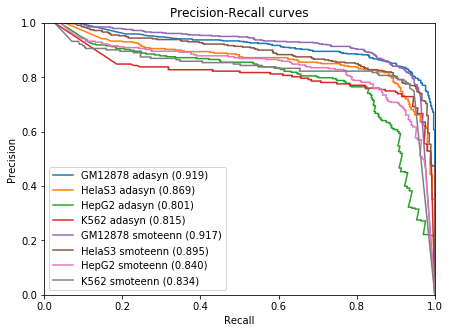

In [9]:
roc(results, 'AE-IE_4layers_150_roc.pdf')
pr(results, 'AE-IE_4layers_150_pr.pdf')

### Adasyn accuracy

In [10]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-E","I-E"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-E       I-E
GM12878  0.976639  0.858974  0.987988
HelaS3   0.979577  0.839335  0.987432
HepG2    0.979181  0.798658  0.986970
K562     0.989657  0.760417  0.996068

### SMOTEENN accuracy

In [11]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-E","I-E"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-E       I-E
GM12878  0.963912  0.913919  0.968733
HelaS3   0.962092  0.883657  0.966486
HepG2    0.972935  0.859060  0.977849
K562     0.983565  0.822917  0.988057